# CE UQ Estimation of probability models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, uniform, bernoulli
from scipy.special import factorial

## Part 1. Maximum likelihood estimation

Is my coin biased? $\theta$ is the probability of getting heads (Y=1
)

In [2]:
data_coin_tosses = [1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0]

In [3]:
# MLE estimate and standard error from lecture notes
def compute_p_mle(data):
    n1 = np.sum(data)
    n = len(data)
    theta_hat = n1 / n
    return theta_hat

def compute_se(data):
    theta_hat = compute_p_mle(data)
    se = np.sqrt(theta_hat*(1-theta_hat)/len(data))
    return se

p_mle = compute_p_mle(data_coin_tosses)
print('MLE estimate = {:.3f}'.format(p_mle))
se = compute_se(data_coin_tosses)
print('SE = {:.3f}'.format(se))
ylow, yup = p_mle - 1.96 * se, p_mle + 1.96 * se
print('95% conf interval = [{:.3f}, {:.3f}]'.format(ylow, yup))

MLE estimate = 0.633
SE = 0.088
95% conf interval = [0.461, 0.806]


### Visualize the sampling distribution

Generate random datasets (N=30) from a population with true probability of success p=0.6, then compute the max likelihood estimate every time and plot a histogram of all the values.

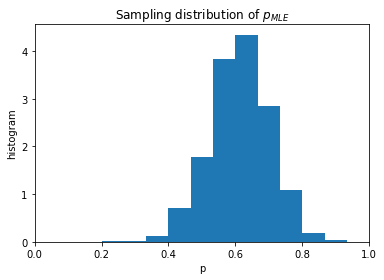

Mean of the sampling distribution = 0.597
Std. dev. of the sampling distribution = Standard Error = 0.091


In [4]:
list_of_mles = []
for i in range(2000):
    data = bernoulli(p=0.6).rvs(size=30)
    p_mle = compute_p_mle(data)
    list_of_mles.append(p_mle)
    
fig, ax = plt.subplots()
ax.hist(list_of_mles, density=True, bins=np.linspace(0., 1, 16))
ax.set_xlabel('p')
ax.set_ylabel('histogram')
ax.set_title(r'Sampling distribution of $p_{MLE}$')
ax.set_xlim([0, 1.])
plt.show()

print('Mean of the sampling distribution = {:.3f}'.format(np.mean(list_of_mles)))
print('Std. dev. of the sampling distribution = Standard Error = {:.3f}'.format(np.std(list_of_mles, ddof=1)))

## Part 2. Bayesian inference

First, define a uniform prior over [0, 1]

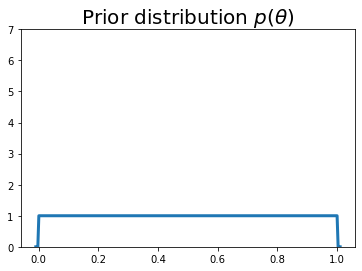

In [5]:
from scipy.stats import uniform
def evaluate_prior(xvalues):
    return uniform.pdf(xvalues)

x = np.linspace(-0.01, 1.01, 300)
plt.plot(x, evaluate_prior(x), linewidth=3)
plt.title(r'Prior distribution $p(\theta)$', fontsize=20)
plt.ylim([0., 7.])
plt.show()

In [11]:
# Function to generate data
def sample_from_bernoulli_population(N):
    return bernoulli(p=0.6).rvs(size=N)

# Function to compute posterior density, see lecture notes
def evaluate_posterior(xvalues, data):
    nheads = np.sum(data)
    ntails = len(data) - nheads
    return factorial(nheads+ntails+1) / (factorial(nheads)*factorial(ntails)) * xvalues ** nheads * (1-xvalues) ** ntails

Visaulize posterior, for a dataset of size 30.

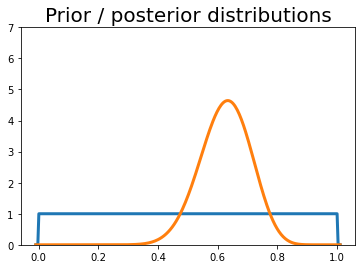

In [12]:
x = np.linspace(-0.01, 1.01, 300)
plt.plot(x, evaluate_prior(x), linewidth=3)
plt.plot(x, evaluate_posterior(x, data_coin_tosses), linewidth=3)
plt.title(r'Prior / posterior distributions', fontsize=20)
plt.ylim([0., 7.])
plt.show()

Visualize how the posterior get updated as you add more data.

[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 

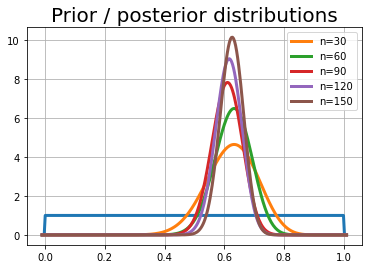

In [26]:
x = np.linspace(-0.01, 1.01, 300)
plt.plot(x, evaluate_prior(x), linewidth=3)
plt.title(r'Prior / posterior distributions', fontsize=20)

data = list(data_coin_tosses)
plt.plot(x, evaluate_posterior(x, data), linewidth=3, label='n={}'.format(len(data)))
for i in range(4):
    data = data + list(sample_from_bernoulli_population(N=30))
    print(data)
    plt.plot(x, evaluate_posterior(x, data), linewidth=3, label='n={}'.format(len(data)))
plt.legend()
plt.grid(True)
plt.show()